## Dataset Context

## Task

## Importing all required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [2]:
df=pd.read_csv('C:\\Users\\Rageshwar\\Downloads\\CC GENERAL.csv')

In [3]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### stastical describtion of dataset

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### dropping the customer id

In [5]:
df.drop(['CUST_ID'],axis=1,inplace = True)

### stastical describtion of data set

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### checking for null values

In [7]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### filling null values with median 

In [8]:
df=df.fillna(df.median())

In [9]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### As per visualization we can see that there are alot of outliers

<function matplotlib.pyplot.xticks>

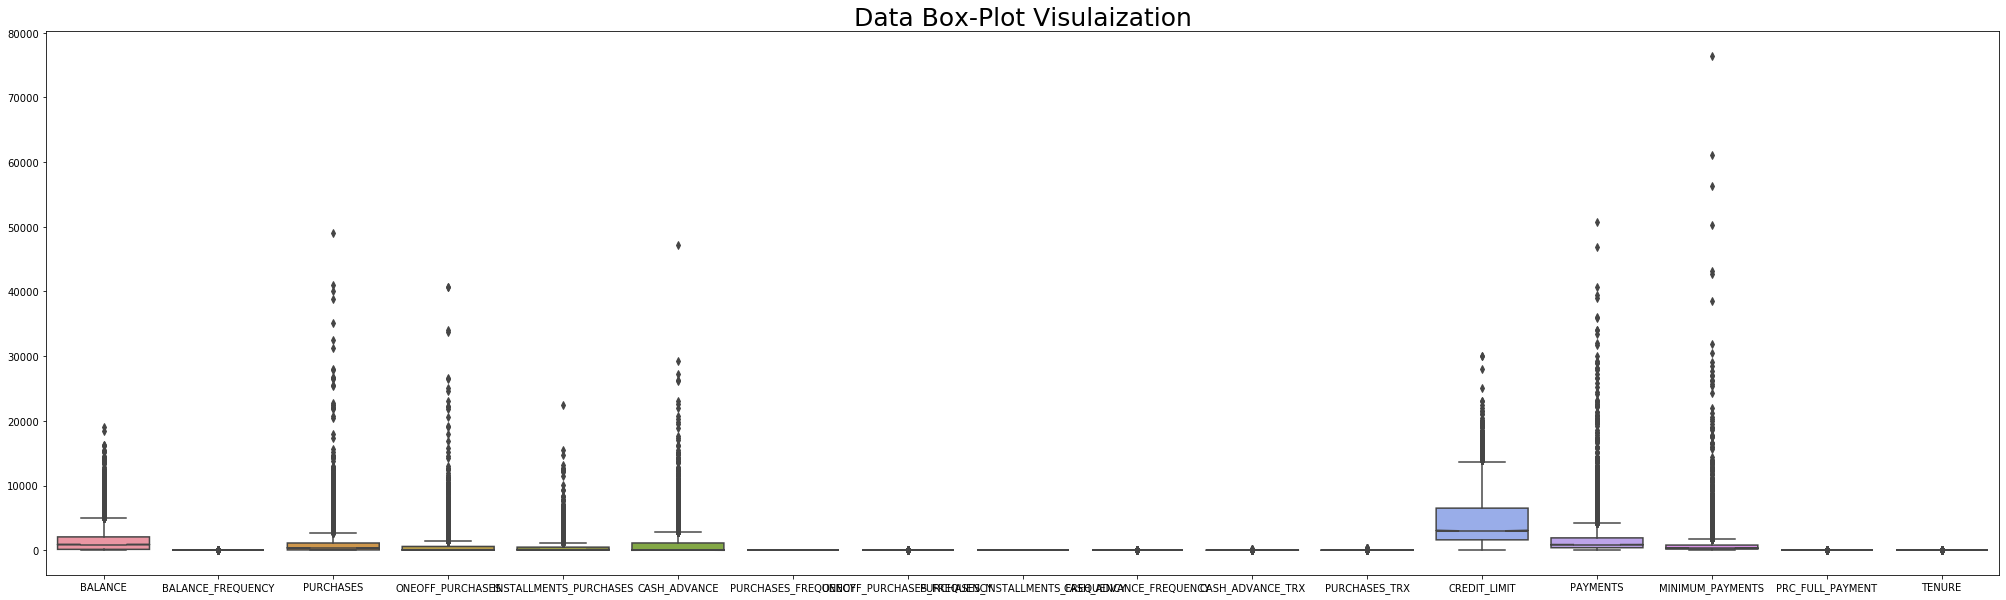

In [10]:
plt.figure(figsize=(35,10))
sns.boxplot(data=df,notch=True)
plt.title('Data Box-Plot Visulaization',fontsize=25)
plt.xticks

## Handling Outliers

### By dropping outliers we can lose many rows as there are too many outliers in dataset.
### So making ranges to deal with extreme values.

In [11]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT','PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    Range=c+'_Range'
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=500)),Range]=1
    df.loc[((df[c]>500)&(df[c]<=1000)),Range]=2
    df.loc[((df[c]>1000)&(df[c]<=3000)),Range]=3
    df.loc[((df[c]>3000)&(df[c]<=5000)),Range]=4
    df.loc[((df[c]>5000)&(df[c]<=10000)),Range]=5
    df.loc[((df[c]>10000)),Range]=6

In [12]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=0.1)),Range]=1
    df.loc[((df[c]>0.1)&(df[c]<=0.2)),Range]=2
    df.loc[((df[c]>0.2)&(df[c]<=0.3)),Range]=3
    df.loc[((df[c]>0.3)&(df[c]<=0.4)),Range]=4
    df.loc[((df[c]>0.4)&(df[c]<=0.5)),Range]=5
    df.loc[((df[c]>0.5)&(df[c]<=0.6)),Range]=6
    df.loc[((df[c]>0.6)&(df[c]<=0.7)),Range]=7
    df.loc[((df[c]>0.7)&(df[c]<=0.8)),Range]=8
    df.loc[((df[c]>0.8)&(df[c]<=0.9)),Range]=9
    df.loc[((df[c]>0.9)&(df[c]<=1.0)),Range]=10

In [13]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    df[Range]=0
    df.loc[((df[c]>0)&(df[c]<=5)),Range]=1
    df.loc[((df[c]>5)&(df[c]<=10)),Range]=2
    df.loc[((df[c]>10)&(df[c]<=15)),Range]=3
    df.loc[((df[c]>15)&(df[c]<=20)),Range]=4
    df.loc[((df[c]>20)&(df[c]<=30)),Range]=5
    df.loc[((df[c]>30)&(df[c]<=50)),Range]=6
    df.loc[((df[c]>50)&(df[c]<=100)),Range]=7
    df.loc[((df[c]>100)),Range]=8

In [14]:
df.drop(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

x=np.asanyarray(df)

### As by visualization we can see here we handeled the extreme outliers

<function matplotlib.pyplot.xticks>

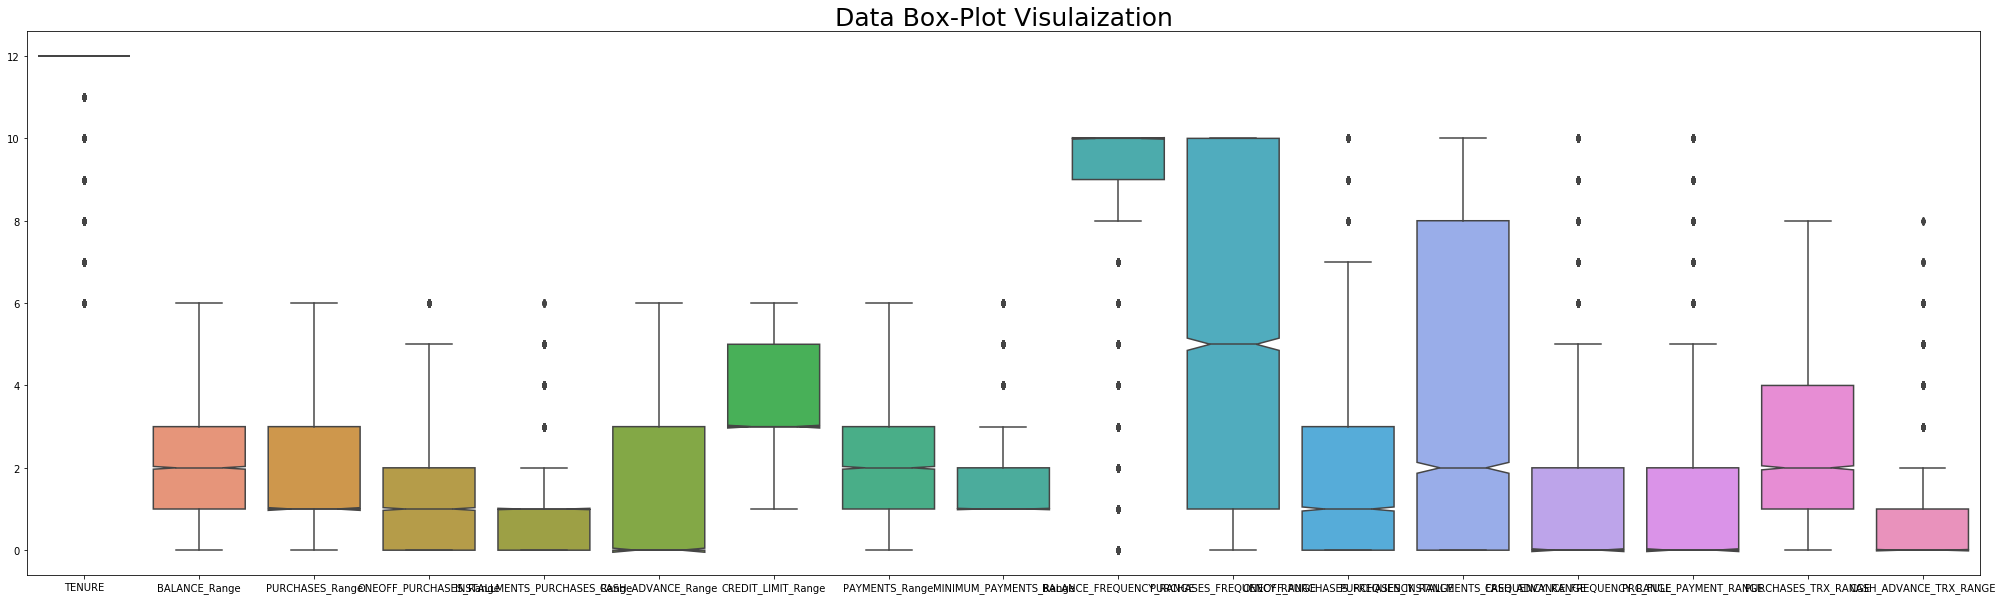

In [15]:
plt.figure(figsize=(35,10))
sns.boxplot(data=df,notch=True)
plt.title('Data Box-Plot Visulaization',fontsize=25)
plt.xticks

### Frequency table for each features

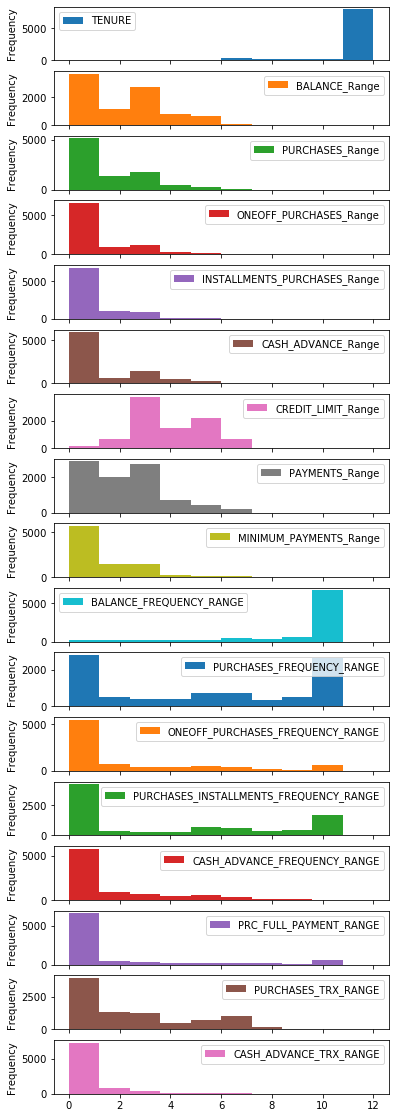

In [16]:
df.plot(kind='hist', subplots=True, figsize=(6,20), sharex=True)
plt.show()

### Distribution table 

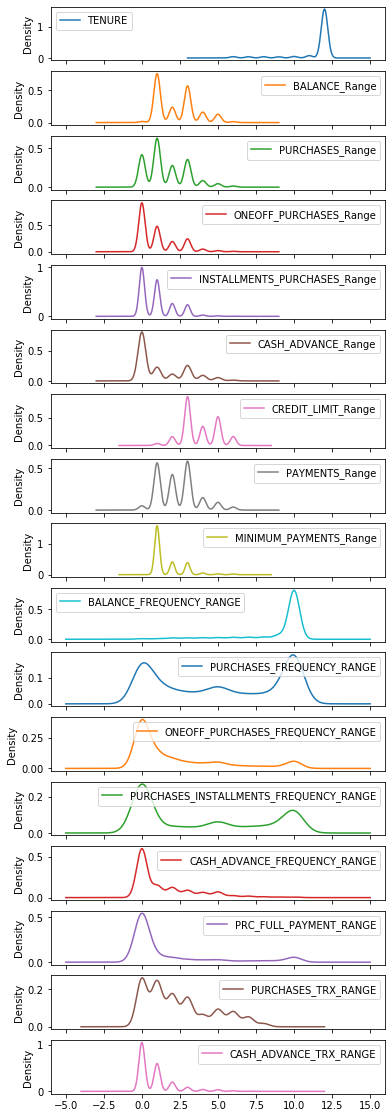

In [17]:
df.plot(kind='kde', subplots=True, figsize=(6,20), sharex=True )
plt.show()

### check the corelation between features

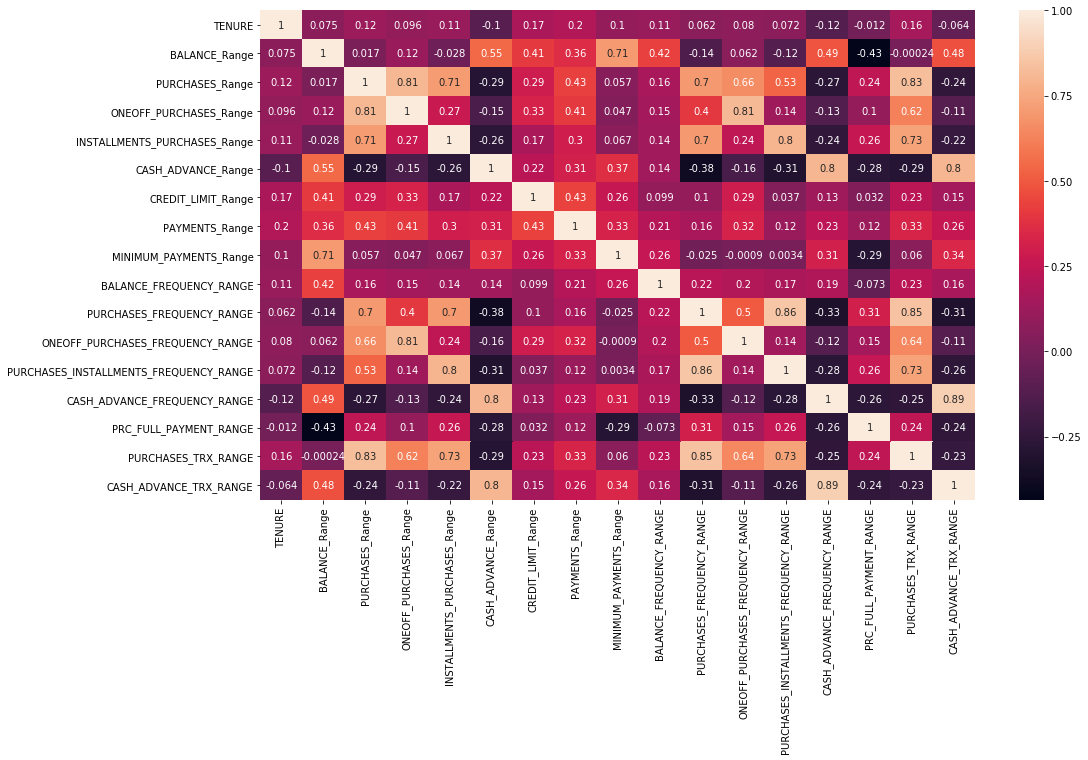

In [18]:
corr=df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(data=corr,annot=True)
plt.show()

### Applying the standard scalar

In [19]:
scale=StandardScaler()
X=scale.fit_transform(x)

In [20]:
X

array([[ 0.36067954, -0.97851102, -0.43862278, ..., -0.54119881,
        -0.64681226, -0.69462206],
       [ 0.36067954,  1.29798329, -1.18015543, ...,  0.45299851,
        -1.09971241,  0.12597818],
       [ 0.36067954,  0.53915185,  0.30290987, ..., -0.54119881,
         0.25898804, -0.69462206],
       ...,
       [-4.12276757, -0.97851102, -0.43862278, ...,  0.45299851,
        -0.64681226, -0.69462206],
       [-4.12276757, -0.97851102, -1.18015543, ...,  0.45299851,
        -1.09971241,  0.12597818],
       [-4.12276757, -0.97851102,  1.04444252, ..., -0.54119881,
         1.16478834,  0.12597818]])

### Applying the PCA for dimensionality reduction

In [21]:
pca=PCA(n_components=17)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=17, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
pca_component=pca.fit_transform(X)

In [23]:
pca.explained_variance_

array([5.49361967, 3.84089654, 1.54160392, 1.25464388, 1.06798676,
       0.85857517, 0.72382493, 0.58095614, 0.46425521, 0.30771145,
       0.20741858, 0.18268815, 0.17255759, 0.10666829, 0.10083824,
       0.07079183, 0.02686329])

In [24]:
pca.explained_variance_ratio_

array([0.32311799, 0.22590985, 0.09067245, 0.07379434, 0.06281573,
       0.05049878, 0.04257318, 0.03417007, 0.02730608, 0.01809865,
       0.01219973, 0.01074516, 0.01014931, 0.0062739 , 0.005931  ,
       0.00416376, 0.00158002])

### plotting PCA variance graph 

In [25]:
component=[i for i in range(0,17)]

variance=[]

for i in component:
    pca=PCA(n_components=i)
    fit=pca.fit(X)
    var=np.sum(fit.explained_variance_ratio_)
    variance.append(var)
    

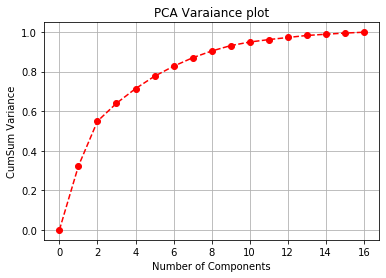

In [26]:

plt.plot(component,variance,'ro--')
plt.xlabel('Number of Components')
plt.ylabel('CumSum Variance')
plt.grid()
plt.title('PCA Varaiance plot')
plt.show()

### As per PCA variance graph we can see that 8 components have 90% of variance

In [27]:
pca_component

array([[-1.0739866 , -2.42208658, -0.22207558, ...,  0.04041255,
         0.15103856,  0.02286384],
       [-2.81543191,  2.31571215,  0.05589137, ...,  0.08775875,
        -0.15059154, -0.00538875],
       [ 1.42403182,  0.56696176,  2.12376939, ..., -0.6895291 ,
         0.45397763,  0.15675541],
       ...,
       [-0.13271076, -2.82475129, -1.59366678, ..., -0.46514415,
        -0.00465059,  0.12916449],
       [-2.85002583, -2.46180799, -0.34629389, ...,  0.41284465,
        -0.18093103, -0.05637233],
       [ 0.50092248, -0.40752322,  1.79223694, ...,  0.69904747,
         0.61269778,  0.06003144]])

## elbow method using K means clustering for finding n_clusters

In [28]:
k=[i for i in range(1,30)]
cost=[]
for i in k:
    kmean=KMeans(n_clusters=i)
    kmean.fit(pca_component)
    distance=kmean.inertia_
    cost.append(distance)

Text(0.5, 1.0, 'Elbow method')

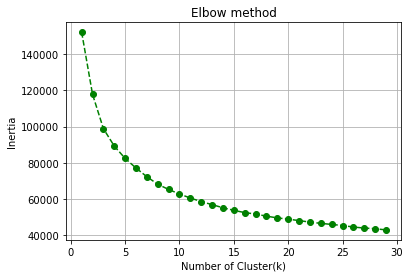

In [29]:
plt.plot(k,cost,'go--')
plt.xlabel('Number of Cluster(k)')
plt.ylabel('Inertia')
plt.grid(which='both',)
plt.title('Elbow method')

###  by visualization we see that n_cluster=6

### applying k-means cluster model

In [30]:
kmean=KMeans(n_clusters=6,init='k-means++',random_state=0)
y_kmeans=kmean.fit_predict(pca_component)

In [31]:
Clusters=kmean.labels_
Clusters

array([3, 5, 4, ..., 1, 3, 4])

In [32]:
y_kmeans.size

8950

In [33]:
cluster_centers=kmean.cluster_centers_
cluster_centers

array([[-8.45356787e-01, -2.23125922e+00,  8.15174285e-01,
         4.29452439e-01,  7.48262616e-01,  1.20207781e+00,
        -7.24472952e-01,  1.24998170e-01, -3.02298592e-01,
        -3.77202307e-03, -3.08580646e-02, -4.26991288e-02,
        -9.57325001e-02, -1.66812658e-03, -1.27960948e-02,
        -6.05091438e-03,  2.80053548e-03],
       [ 1.22290971e+00, -1.31487577e+00, -1.32552423e+00,
         1.53383404e-02,  1.83740157e-02, -2.08073213e-01,
         2.01998630e-01, -7.90164563e-02,  9.28374754e-03,
        -1.04574722e-01,  8.25405367e-02,  1.51276859e-01,
        -1.84724538e-02,  1.28365220e-03, -5.36748470e-02,
         6.09841785e-02,  4.31061287e-03],
       [ 1.37039310e+00,  3.11112819e+00, -7.27975218e-01,
         1.43966169e-01, -1.79517080e-01,  4.25818153e-01,
        -4.57390841e-01,  2.67067473e-02, -2.88348771e-01,
         3.35826162e-02, -1.53665470e-01,  9.60128434e-02,
         8.97507174e-02, -6.62559541e-02, -9.47304189e-03,
         8.84597765e-02,  1.8

In [34]:
df['Class']=Clusters

In [35]:
df.head()

,TENURE,BALANCE_Range,PURCHASES_Range,ONEOFF_PURCHASES_Range,INSTALLMENTS_PURCHASES_Range,CASH_ADVANCE_Range,CREDIT_LIMIT_Range,PAYMENTS_Range,MINIMUM_PAYMENTS_Range,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,Class
0,12,1,1,0,1,0,2,1,1,9,2,0,1,0,0,1,0,3
1,12,4,0,0,0,5,5,4,3,10,0,0,0,3,3,0,1,5
2,12,3,2,2,0,0,5,2,2,10,10,10,0,0,0,3,0,4
3,12,3,3,3,0,1,5,0,1,7,1,1,0,1,0,1,1,3
4,12,2,1,1,0,0,3,2,1,10,1,1,0,0,0,1,0,3


In [36]:
df.groupby(by='Class').sum()

,TENURE,BALANCE_Range,PURCHASES_Range,ONEOFF_PURCHASES_Range,INSTALLMENTS_PURCHASES_Range,CASH_ADVANCE_Range,CREDIT_LIMIT_Range,PAYMENTS_Range,MINIMUM_PAYMENTS_Range,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
Class,,,,,,,,,,,,,,,,,
0,12849,1084,1226,722,603,535,3986,1819,1164,4313,3241,1039,2143,426,2533,1341,299
1,22541,2946,3421,690,3143,412,6408,3633,2611,18771,17116,1376,16109,503,5999,6385,283
2,9291,3083,2312,1507,1526,2295,3640,2707,2297,7833,6856,3155,5581,2776,273,3817,1557
3,27090,5671,1672,1410,463,3176,7711,4145,3456,22895,3775,2508,1303,3876,565,1751,2012
4,17756,3204,5071,4362,2531,330,6662,4812,2104,14647,13545,10836,8609,372,4729,7835,234
5,13553,4503,542,426,178,4360,5410,3788,2977,11475,1361,763,590,5643,517,603,3191


In [37]:
df.groupby(by='Class').mean()

,TENURE,BALANCE_Range,PURCHASES_Range,ONEOFF_PURCHASES_Range,INSTALLMENTS_PURCHASES_Range,CASH_ADVANCE_Range,CREDIT_LIMIT_Range,PAYMENTS_Range,MINIMUM_PAYMENTS_Range,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
Class,,,,,,,,,,,,,,,,,
0,11.290861,0.952548,1.077329,0.634446,0.529877,0.470123,3.502636,1.598418,1.022847,3.789982,2.847979,0.913005,1.883128,0.374341,2.225835,1.178383,0.262742
1,11.436327,1.494673,1.735667,0.350076,1.594622,0.209031,3.251142,1.843227,1.324708,9.523592,8.683917,0.698123,8.173009,0.255200,3.043633,3.239472,0.143582
2,11.731061,3.892677,2.919192,1.902778,1.926768,2.897727,4.595960,3.417929,2.900253,9.890152,8.656566,3.983586,7.046717,3.505051,0.344697,4.819444,1.965909
3,11.473952,2.401948,0.708175,0.597205,0.196103,1.345193,3.265989,1.755612,1.463787,9.697162,1.598899,1.062262,0.551885,1.641677,0.239305,0.741635,0.852181
4,11.845230,2.137425,3.382922,2.909940,1.688459,0.220147,4.444296,3.210140,1.403602,9.771181,9.036024,7.228819,5.743162,0.248165,3.154770,5.226818,0.156104
5,11.398654,3.787216,0.455845,0.358284,0.149706,3.666947,4.550042,3.185870,2.503785,9.650967,1.144659,0.641716,0.496215,4.746005,0.434819,0.507149,2.683768


## Interpretion of cluster

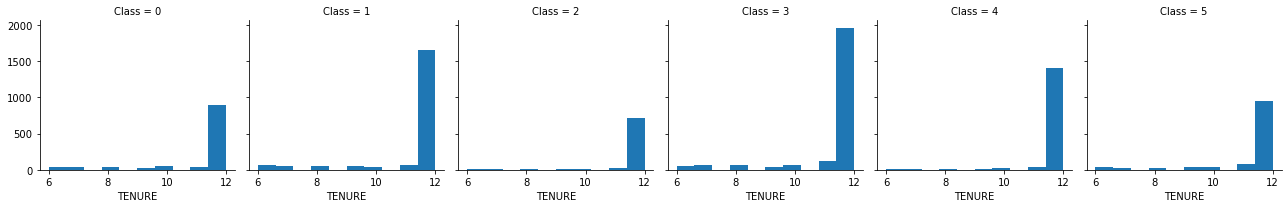

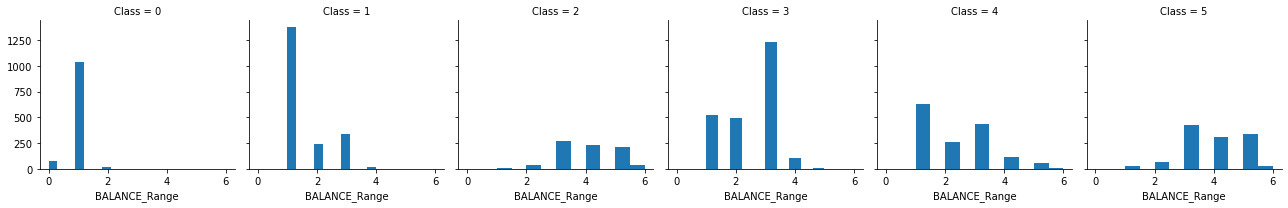

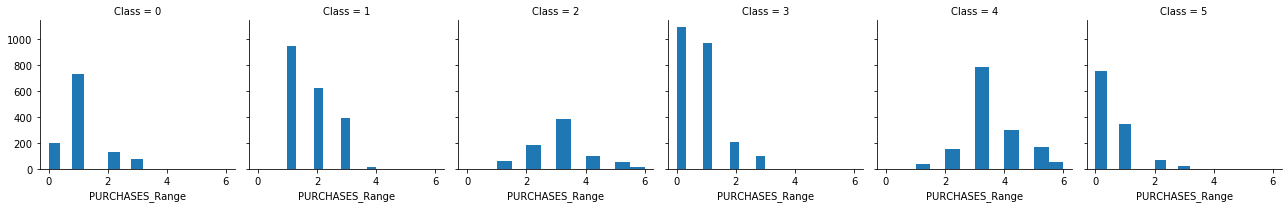

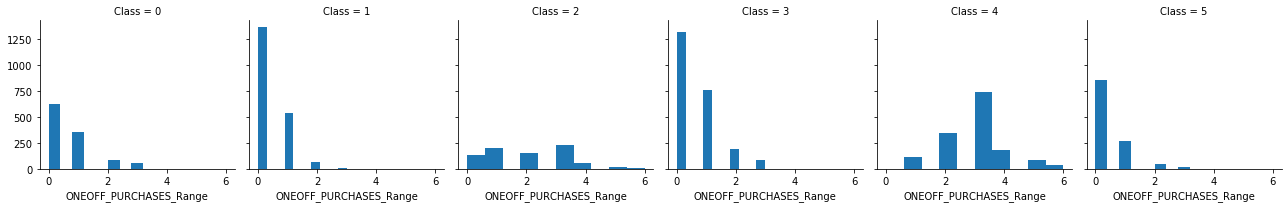

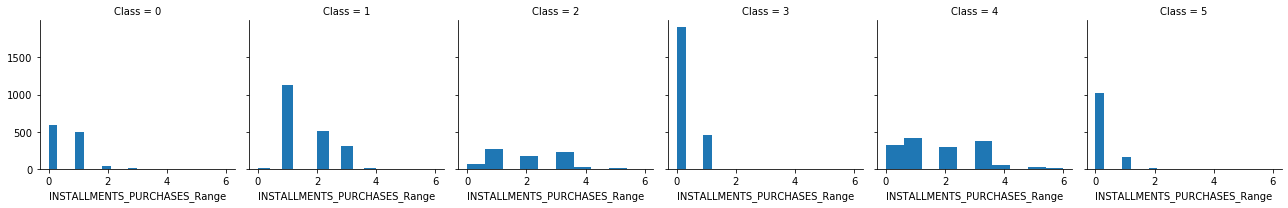

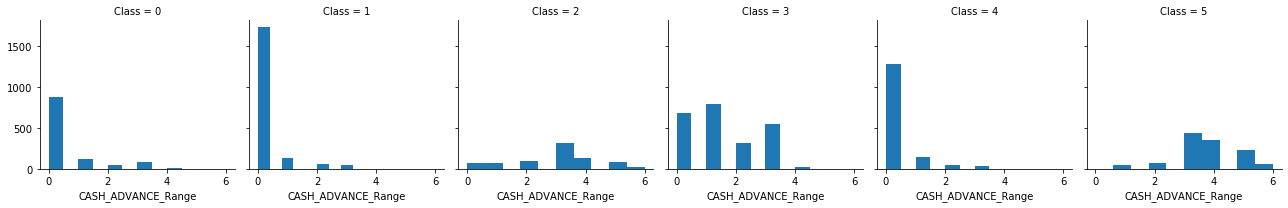

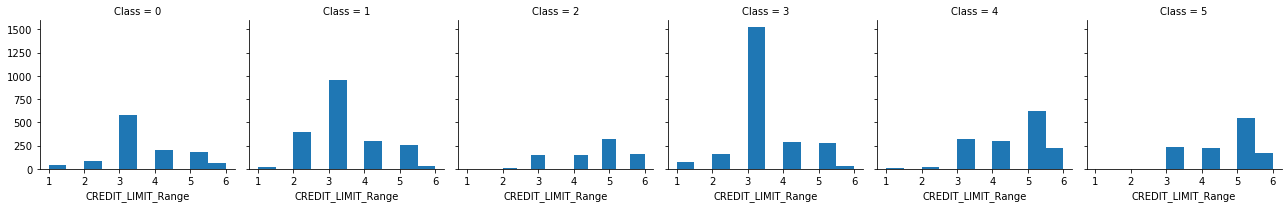

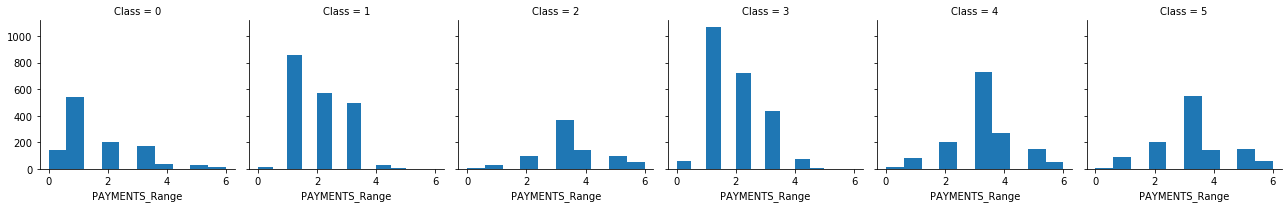

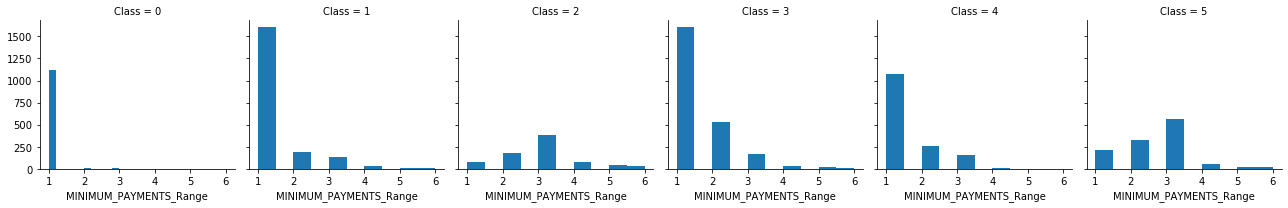

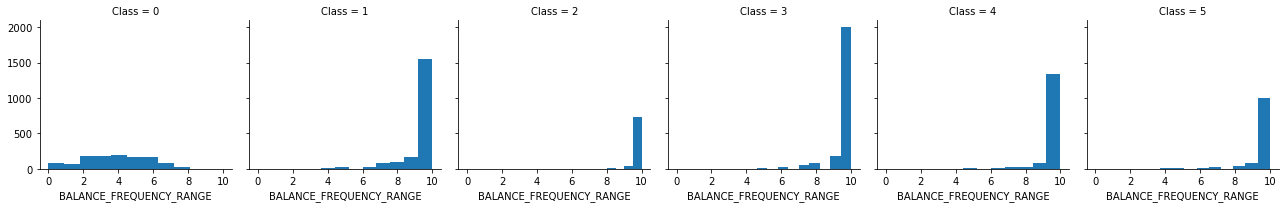

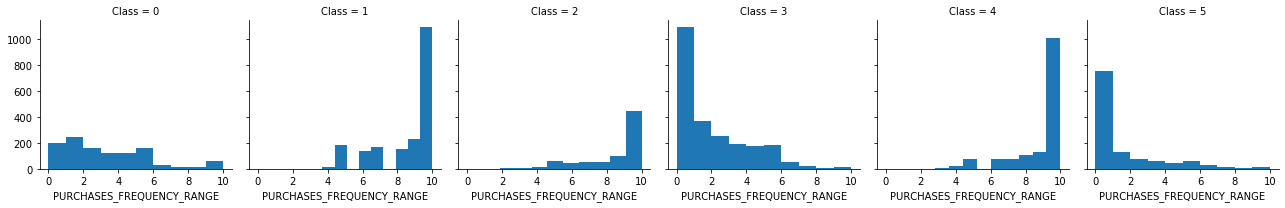

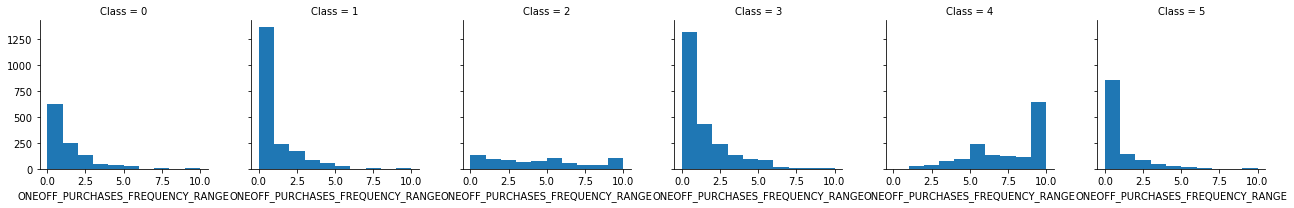

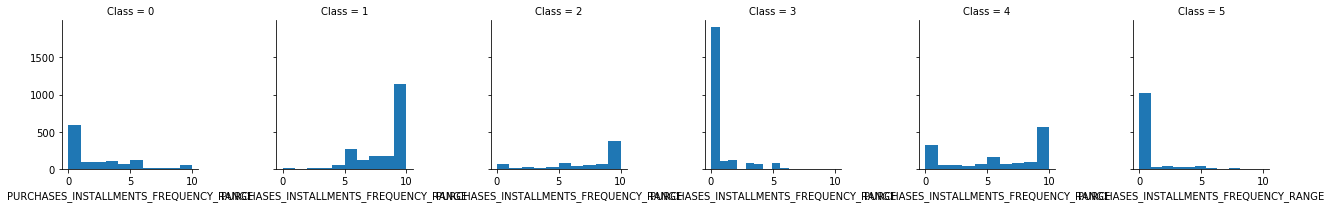

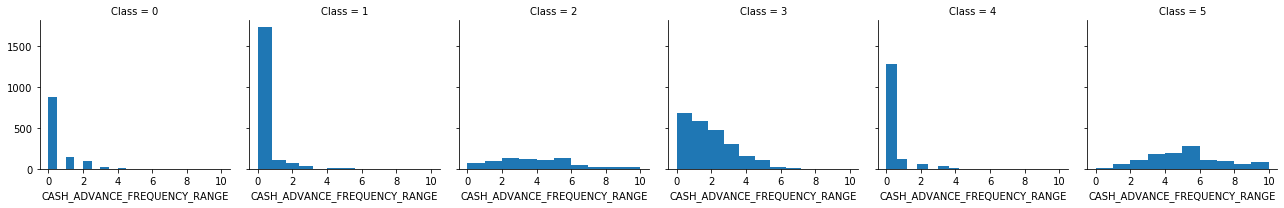

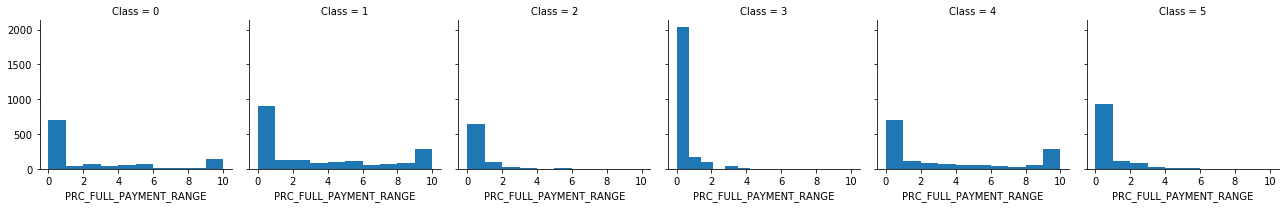

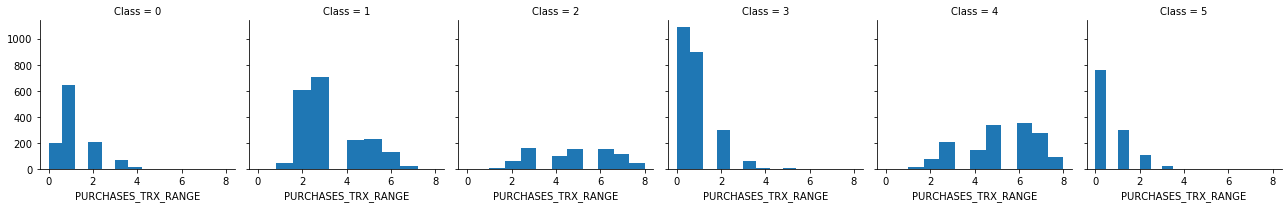

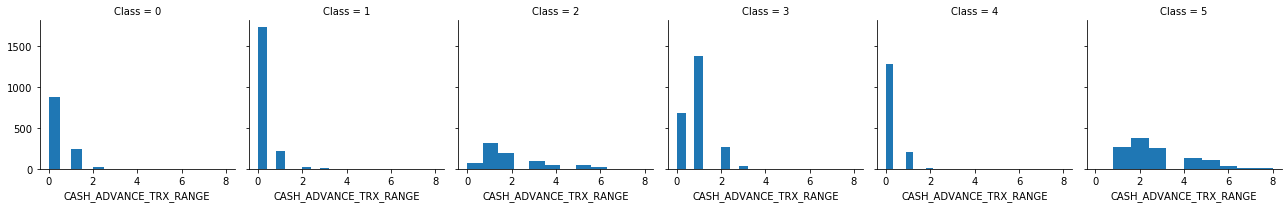

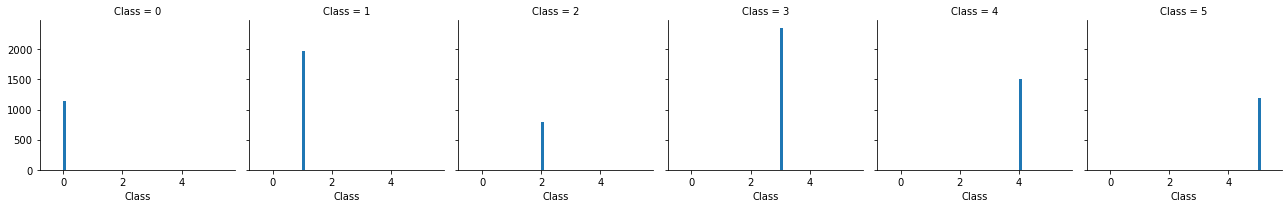

In [38]:
for c in df:
    grid=sns.FacetGrid(data=df,col='Class')
    grid.map(plt.hist,c)

## visualization of cluster

### Using PCA to transform data to 2 dimension for visualization

In [39]:
pca_visual=PCA(n_components=2)

In [40]:
pca_component_visual=pca_visual.fit_transform(X)

In [41]:
pca_component_visual

array([[-1.07398673, -2.42208882],
       [-2.815432  ,  2.31570928],
       [ 1.42403185,  0.5669606 ],
       ...,
       [-0.13271068, -2.82475061],
       [-2.85002592, -2.46180794],
       [ 0.50092242, -0.40752366]])

C:\Users\Rageshwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  
C:\Users\Rageshwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  This is separate from the ipykernel package so we can avoid doing imports until


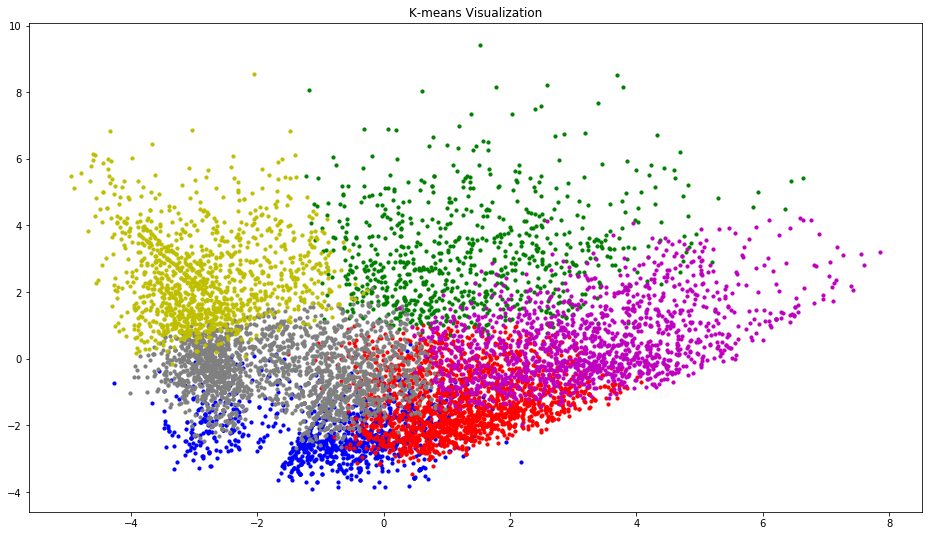

In [42]:
plt.figure(figsize=(16,9))
plt.scatter(pca_component_visual[Clusters==0, 0], pca_component_visual[Clusters==0, 1], color = 'B', s=10, )
plt.scatter(pca_component_visual[Clusters==1, 0], pca_component_visual[Clusters==1, 1], color = 'R', s=10, )
plt.scatter(pca_component_visual[Clusters==2, 0], pca_component_visual[Clusters==2, 1], color = 'g', s=10, )
plt.scatter(pca_component_visual[Clusters==3, 0], pca_component_visual[Clusters==3, 1], color = 'Grey', s=10, )

plt.scatter(pca_component_visual[Clusters==4, 0], pca_component_visual[Clusters==4, 1], color = 'm', s=10, )
plt.scatter(pca_component_visual[Clusters==5, 0], pca_component_visual[Clusters==5, 1], color = 'y', s=10, )
plt.title('K-means Visualization')
plt.show()

## Applying Hierarchical Clustering

In [ ]:
## Importing libraries for applying herirachical clustering

In [47]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering

In [45]:
pca_component[0:5]

array([[-1.07398660e+00, -2.42208658e+00, -2.22075576e-01,
        -8.41685242e-01, -3.93594714e-01, -5.76727361e-01,
        -4.87824218e-01,  4.65275357e-01,  5.04152112e-01,
         5.19053079e-01,  5.75893445e-02, -3.82808394e-01,
         4.24283506e-01,  1.02410592e-02,  4.04125489e-02,
         1.51038559e-01,  2.28638376e-02],
       [-2.81543191e+00,  2.31571215e+00,  5.58913729e-02,
        -3.35519628e-01,  1.59005659e+00,  2.16379128e-03,
         1.39336633e+00,  4.11392844e-01,  8.93087824e-03,
        -6.46190188e-01, -9.60341210e-01,  2.21354907e-01,
         6.16428943e-01, -4.75385962e-01,  8.77587510e-02,
        -1.50591543e-01, -5.38874926e-03],
       [ 1.42403182e+00,  5.66961758e-01,  2.12376939e+00,
        -1.32063663e+00, -1.08984005e+00, -1.74720069e-01,
         4.89874762e-01, -8.02416879e-01, -1.01339952e+00,
        -1.01887423e+00,  1.95560758e-01, -6.93149261e-01,
         2.95166941e-02, -1.84752845e-02, -6.89529099e-01,
         4.53977632e-01,  1.5

In [ ]:
## Distance Matrix 

In [48]:
dist_matrix=distance_matrix(pca_component,pca_component)

In [49]:
dist_matrix.shape

(8950, 8950)

In [50]:
dist_matrix[0:5]

array([[0.        , 6.08240186, 5.44967023, ..., 5.12149882, 5.06650374,
        6.68954946],
       [6.08240186, 0.        , 6.3785739 , ..., 7.97946408, 7.29643669,
        8.41633717],
       [5.44967023, 6.3785739 , 0.        , ..., 7.05917838, 7.85837406,
        6.05888301],
       [4.51169419, 5.93946716, 4.67238561, ..., 6.93948672, 6.89054131,
        6.08906268],
       [1.9486543 , 5.18734602, 4.45391732, ..., 5.62124053, 5.37077858,
        6.44094018]])

In [51]:
z=hierarchy.linkage(dist_matrix,'complete')

C:\Users\Rageshwar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


In [ ]:
## Optimizing the n no. of cluster from Hierarchical dendrogram
### As we can see that there ar 4 optimized clusters 

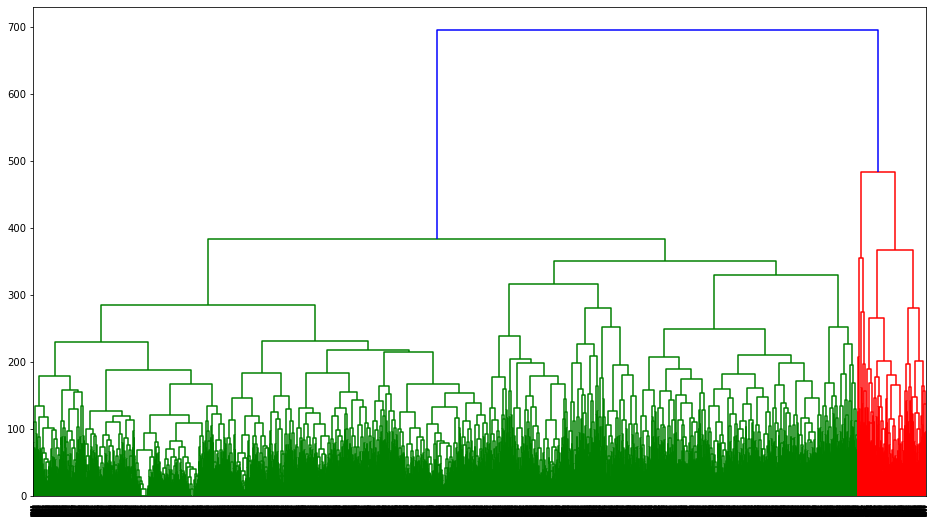

In [54]:
plt.figure(figsize=(16,9))
dendro=hierarchy.dendrogram(z)

In [58]:
hier_algom=AgglomerativeClustering(n_clusters=4,linkage='complete')

In [59]:
hier_algom.fit(pca_component)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=4)

In [60]:
hier_algom.labels_

array([2, 1, 2, ..., 2, 1, 2], dtype=int64)

In [61]:
np.unique(hier_algom.labels_,return_counts=True)

(array([0, 1, 2, 3], dtype=int64),
 array([1951, 2013, 4760,  226], dtype=int64))

In [67]:
Cluster=hier_algom.labels_
Cluster

array([2, 1, 2, ..., 2, 1, 2], dtype=int64)

In [65]:
df['Class']=hier_algom.labels_

In [ ]:
# visualizing clusters

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

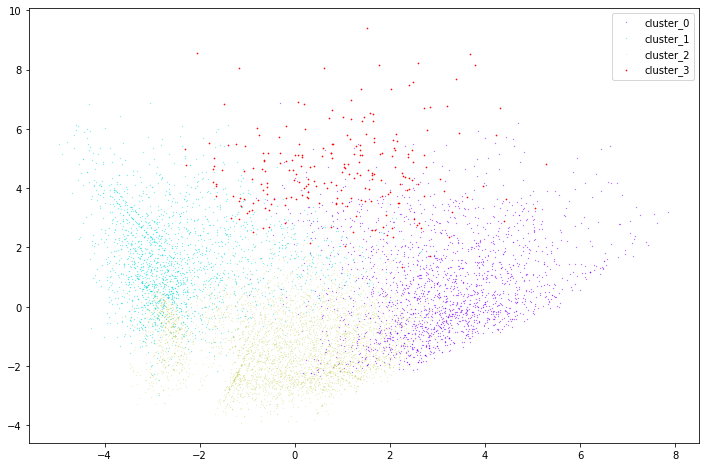

In [69]:
import matplotlib.cm as cm
plt.figure(figsize=(12,8))
color=cm.rainbow(np.linspace(0,1,max(Cluster)+1))
for clstr,color in zip(range(max(Cluster)+1),color):
    subset=pca_component_visual[df['Class']==clstr]
    plt.scatter(subset[:,0],subset[:,1],c=color,s=(100/len(subset)),label='cluster_'+str(clstr))
    plt.legend()